In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets, model_selection, metrics
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



from functions import * 

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [3]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()



,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [4]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Merge the 3 dataframes on the 'client_id' column

In [5]:
# Merging df_demo and df_experiment, df_web, on client_id
df3 = merge_3(df_demo, df_experiment, df_web)
df3.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


### Convert 'date_time' to datetime Format

In [6]:
# (Nat)f_2.1.Convert to datetime
df3_processed_date = process_datetime(df3, datetime_column='date_time', sort_columns=['visit_id', 'date_time'])
df3_processed_date.head(10)


,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
300510,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
76889,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56
76888,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12
76887,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21
76886,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35
76885,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41
76884,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45
76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
76882,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04


### Check that each visit_id has only 1 "confirm" step

In [7]:
# (Nat)f_2.2.Check that each visit_id has only 1 "confirm" step
count_duplicate_confirms(df3_processed_date)

duplicated 'confirm' steps: 3713


### Remove duplicated 'confirm' steps (keep only 1st occurrence)

In [8]:
# (Nat)f_2.3.Remove duplicated 'confirm' steps (keep only 1st occurrence)
df_cleaned_no_duplicated_confirms_step = remove_duplicate_confirms(df3_processed_date)
count_duplicate_confirms(df_cleaned_no_duplicated_confirms_step)

duplicated 'confirm' steps: 0


# KPIs:
### 1.Complation Rate
1. Complation Rate. Hypothesis: Group "Test" has 5% increase in compation rate compare to "Control"
2. Complation Rate. How it correlates with the balance amount ?
4. Complation Rate. How it correlates with the age in each group?
5. Complation Rate. How it correlates with the tenure_month in each group?

### 2.Time spent
6. Time per visit. Time per step.
7. Complation rate on each of step. What %of users do we loose on each step in both groups ? Does it correlate with the time spent on each step.

### 3.Support
8. How the call center is colicited in each group?

### 4.Usage of new and old design 
1.  How often the user in each group logons_6_month ?

# KPI-1 Comletion rate:
1. Calculate Completion Rate per day
2. Check the histogram first to see the distribution
3. Remove outliers (IQR, standard deviation methods)
4. Transform (Log, Square Root, Box-Cox)
5. Standardization (`StandardScaler` from sklearn)
6. Normalize (`MinMaxScaler` from the `sklearn.preprocessing` module)
7. Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.

### Calculate Completion Rate per day

In [9]:
# (Nat)f_2.4.Calculate Completion Rate per day
completion_rate_day = completion_rate_day(df_cleaned_no_duplicated_confirms_step)
completion_rate_day

,date,variation,completions,total_visits,completion_rate_per_day
0,2017-03-15,Control,77,121,0.636364
1,2017-03-15,Test,87,146,0.595890
2,2017-03-16,Control,23,47,0.489362
3,2017-03-16,Test,35,56,0.625000
4,2017-03-17,Control,10,24,0.416667
...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879
192,2017-06-19,Control,100,186,0.537634
193,2017-06-19,Test,95,165,0.575758
194,2017-06-20,Control,126,223,0.565022


### Calculate_average_completion_rate_by_group

In [10]:
# (Nat)f_2.5.calculate_difference_in_average_completion_rates :
average_completion_rates_per_group = calculate_difference_in_avg_completion_rates(completion_rate_day)
average_completion_rates_per_group

(  Variation  average_completion_rate
 0   Control                 0.492034
 1      Test                 0.567121,
 0.07508755426657343)

### Histogram: Visualize the distribution

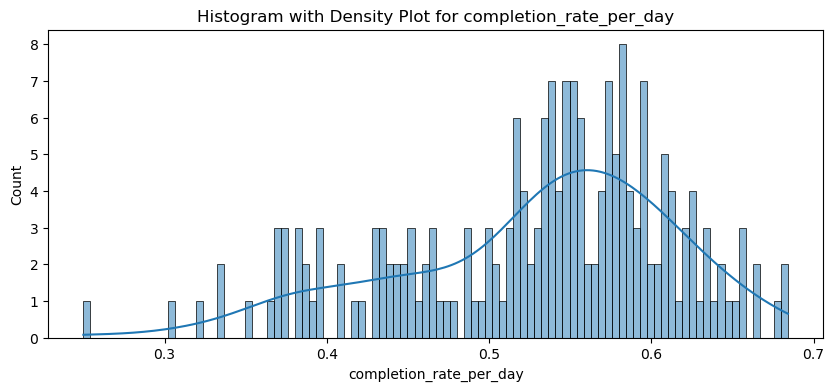

In [11]:
# (Nat)f_2.6.Check if the data is normally distributed with Histogram in completion rate per day
histogram_with_density_plot(completion_rate_day, 'completion_rate_per_day')

### Q-Q Plot: Check how well the data follows a normal distribution.

((array([-2.69398007, -2.38376686, -2.20689251, -2.08020554, -1.9801044 ,
         -1.89662906, -1.82459593, -1.76094837, -1.70372617, -1.65159387,
         -1.60359894, -1.5590371 , -1.5173723 , -1.47818664, -1.44114776,
         -1.40598676, -1.37248286, -1.34045247, -1.3097412 , -1.28021789,
         -1.25177015, -1.22430088, -1.1977256 , -1.17197032, -1.14696984,
         -1.1226664 , -1.0990086 , -1.07595042, -1.05345055, -1.03147173,
         -1.0099802 , -0.98894533, -0.96833918, -0.94813621, -0.928313  ,
         -0.90884804, -0.88972147, -0.87091498, -0.85241159, -0.83419554,
         -0.81625218, -0.79856785, -0.78112982, -0.76392613, -0.74694564,
         -0.73017783, -0.71361286, -0.69724142, -0.68105477, -0.66504463,
         -0.64920317, -0.63352298, -0.61799704, -0.60261866, -0.58738149,
         -0.5722795 , -0.55730692, -0.54245825, -0.52772823, -0.51311183,
         -0.49860425, -0.48420087, -0.46989724, -0.45568911, -0.44157239,
         -0.42754313, -0.41359751, -0.

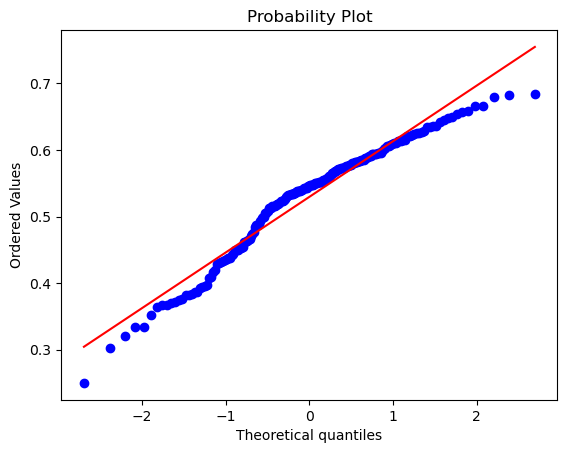

In [12]:
# Q-Q Plot: Check how well the data follows a normal distribution
stats.probplot(completion_rate_day['completion_rate_per_day'], plot=plt)

### Remove outliers from completion rate per day with Standard Deviation Method

In [13]:
# (Nat)f_2.7.Remove outliers from data  with Standard Deviation Method.
completion_rate_day_no_outliers = remove_outliers_std(completion_rate_day, 'completion_rate_per_day', num_std=3)
completion_rate_day_no_outliers

,date,variation,completions,total_visits,completion_rate_per_day
0,2017-03-15,Control,77,121,0.636364
1,2017-03-15,Test,87,146,0.595890
2,2017-03-16,Control,23,47,0.489362
3,2017-03-16,Test,35,56,0.625000
4,2017-03-17,Control,10,24,0.416667
...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879
192,2017-06-19,Control,100,186,0.537634
193,2017-06-19,Test,95,165,0.575758
194,2017-06-20,Control,126,223,0.565022


### Transform data with Box Cox method to make it normally distributed 

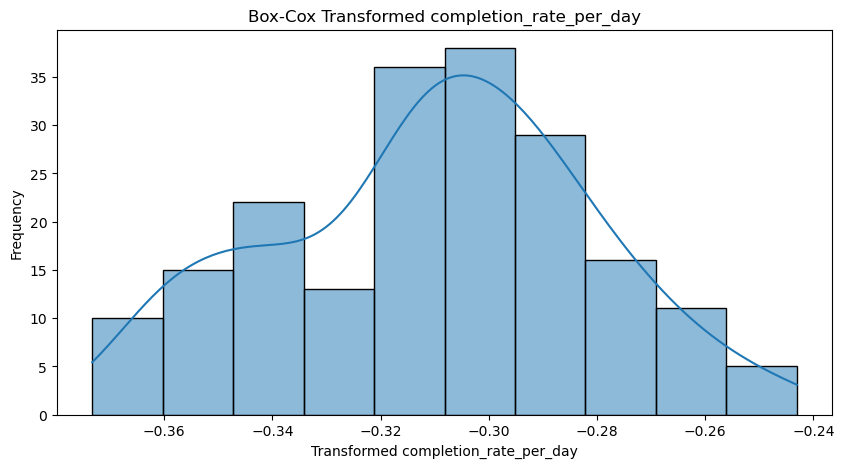

/Users/8mars/Documents/1IRONHACK/projects/Vanguard_Project/notebooks/functions.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_BoxCox'] = transformed_data


In [14]:
# (Nat)f_2.9.Transform data with Box Cox method to make it normally distributed 
completion_rate_day_boxcox = apply_boxcox_and_plot(completion_rate_day_no_outliers, 'completion_rate_per_day')

### Q-Q plot  after box-cox transformation:

((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

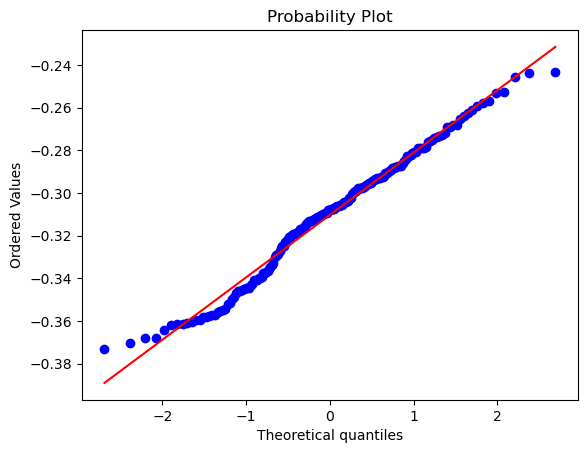

In [15]:
#Q-Q plot after box-cox transformation:
stats.probplot(completion_rate_day_boxcox['completion_rate_per_day_BoxCox'], plot=plt)

### Apply normalization to completion_rate_day_boxcox['completion_rate_per_day_BoxCox'] col:

In [17]:
# (Nat)f_2.10.Apply normalization to completion_rate_day_boxcox['completion_rate_per_day_BoxCox'] col:
def normalize_column(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(
            f"Column '{column_name}' does not exist in the DataFrame")

    # Extract the column to be normalized
    data_to_normalize = df[[column_name]].copy()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data
    normalized_data = scaler.fit_transform(data_to_normalize)

    # Add the normalized data back to the DataFrame using .loc to avoid SettingWithCopyWarning
    normalized_column_name = column_name + '_Normalized'
    df.loc[:, normalized_column_name] = normalized_data

    return df
completion_rate_day_final_normalized = normalize_column(completion_rate_day_boxcox, 'completion_rate_per_day_BoxCox')
completion_rate_day_final_normalized


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_46089/2882142480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, normalized_column_name] = normalized_data


,date,variation,completions,total_visits,completion_rate_per_day,completion_rate_per_day_BoxCox,completion_rate_per_day_BoxCox_Normalized
0,2017-03-15,Control,77,121,0.636364,-0.268192,0.807092
1,2017-03-15,Test,87,146,0.595890,-0.287279,0.660542
2,2017-03-16,Control,23,47,0.489362,-0.328578,0.343455
3,2017-03-16,Test,35,56,0.625000,-0.273748,0.764432
4,2017-03-17,Control,10,24,0.416667,-0.349865,0.180023
...,...,...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879,-0.311325,0.475924
192,2017-06-19,Control,100,186,0.537634,-0.311418,0.475207
193,2017-06-19,Test,95,165,0.575758,-0.296058,0.593139
194,2017-06-20,Control,126,223,0.565022,-0.300549,0.558660


### Check calculate_difference_in_completion_rates after Remove Outliers, BoxCox Transf and Normalization:

In [18]:
# (Nat)f_2.5.calculate_difference_in_average_completion_rates Remove Outliers, BoxCox Transf and Standardization:
average_completion_rates_per_group, difference = calculate_difference_in_avg_completion_rates(completion_rate_day_final_normalized)
print("Average Completion Rates by Group:\n", average_completion_rates_per_group)
print("Difference in Completion Rates: ", difference if difference is not None else "N/A")

Average Completion Rates by Group:
   Variation  average_completion_rate
0   Control                 0.494529
1      Test                 0.567121
Difference in Completion Rates:  0.07259235983464868


### Save to csv the processed file completion_rate_day_boxcox_normalized

In [19]:
#export df_time_per_visit_no_outliers_std df to csv:
completion_rate_day_final_normalized.to_csv('../data/cleaned/df_completion_rate_day_final_normalized.csv', index=False)

### Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.

In [25]:
### Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.
def perform_two_sample_t_test(df):
    # Extract the completion rates for Control and Test groups
    control_rate = df[df['Variation'] == 'Control']['average_completion_rate'].iloc[0]
    test_rate = df[df['Variation'] == 'Test']['average_completion_rate'].iloc[0]
    
    # Hypothetical standard deviations and sample sizes if not given
    std_dev_control = 0.05  # Example standard deviation for Control
    std_dev_test = 0.05     # Example standard deviation for Test
    n_control = 100         # Example sample size for Control
    n_test = 100            # Example sample size for Test

    # Calculate the standard error of the difference between the two means
    se_difference = ((std_dev_control**2 / n_control) + (std_dev_test**2 / n_test))**0.5
    
    # Calculate the T-statistic for the difference between the groups
    t_stat = (test_rate - control_rate - 0.05) / se_difference  # Subtract 0.05 to test for more than 5% difference
    
    # Calculate degrees of freedom for two sample t-test
    df = n_control + n_test - 2
    
    # Calculate the p-value from the t distribution
    p_value = 1 - stats.t.cdf(t_stat, df)
    
    # Interpretation based on p-value
    alpha = 0.05  # significance level
    if p_value < alpha:
        interpretation = ("Reject the null hypothesis: There is significant evidence that " +
                          "the 'Test' group's completion rate is more than 5% higher than the 'Control' group.")
    else:
        interpretation = ("Fail to reject the null hypothesis: There is not significant evidence that " +
                          "the 'Test' group's completion rate is more than 5% higher than the 'Control' group.")
    
    return {'T-statistic': t_stat, 'P-value': p_value, 'Interpretation': interpretation}


#  usage:
result = perform_two_sample_t_test(average_completion_rates_per_group)
result

{'T-statistic': 3.195042168417333,
 'P-value': 0.0008135408272973432,
 'Interpretation': "Reject the null hypothesis: There is significant evidence that the 'Test' group's completion rate is more than 5% higher than the 'Control' group."}

### Complation Rate. How it correlates with the balance amount ?


### Complation Rate. How it correlates with the age in each group?


### Complation Rate. How it correlates with the tenure_month in each group?

## KPI. Time spent per each visit_id. % of lost clients
Time spent per visit 
1. Calculate time per visit 
1. Check the histogram first to see the distribution
2. Remove outliers (IQR, standard deviation methods)
3. Transform (Log, Square Root, Box-Cox)
4. Standardization (`StandardScaler` from sklearn)
5. Normalize (`MinMaxScaler` from the `sklearn.preprocessing` module)

### 1.1. Calculating the time spent for each visit  (sec)

In [ ]:
#calculating the time spent for each visit in seconds:
df_time_per_visit_sec = calculate_time_per_visit_sec(df_cleaned_no_duplicated_confirms_step)
df_time_per_visit_sec.head()

In [ ]:
#export df to csv:
df_time_per_visit_sec.to_csv('../data/cleaned/df_time_per_visit_sec.csv', index=False)

### 1.2. Check if the time spent for each visit is normally distributed with Histogram, check outliers with Boxplot, Shapiro-Wilk test

In [ ]:
#(Nat)Check if the time spent for each visit is normally distributed with Histogram and Boxplot to visually check for outliers
histogram_distribution_boxplot_outliers(df_time_per_visit_sec, 'time_per_visit_in_sec')

Shapiro-Wilk test to check if data time_per_visit is normally distributed

In [ ]:
# (Nat)Shapiro-Wilk test to check if data time_per_visit is normally distributed
shapiro_wilk_test(df_time_per_visit_sec, 'time_per_visit_in_sec')

### 1.3. Removing outliers

### 1.3.1. Remove outliers from data time_per_visit with Standard Deviation Method.

In [ ]:
# (Nat) Remove outliers from data time_per_visit with Standard Deviation Method.
df_time_per_visit_no_outliers_std= remove_outliers_std(df_time_per_visit_sec, 'time_per_visit_in_sec')

In [ ]:
# check without outliers:
histogram_distribution_boxplot_outliers(df_time_per_visit_no_outliers_std, 'time_per_visit_in_sec')

### 1.3.2. Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method

In [ ]:
# (Nat)Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method
df_time_per_visit_no_outliers_iqr = remove_outliers_iqr(df_time_per_visit_sec, 'time_per_visit_in_sec')

In [ ]:
# check without outliers:
histogram_distribution_boxplot_outliers(df_time_per_visit_no_outliers_iqr, 'time_per_visit_in_sec')

In [ ]:
#export df_time_per_visit_no_outliers_std df to csv:
df_time_per_visit_no_outliers_iqr.to_csv('../data/cleaned/df_time_per_visit_no_outliers_iqr.csv', index=False)

Standardization. Apply scaler 

In [ ]:
# Step 3: Standardization
scaler = StandardScaler()
df_time_per_visit_no_outliers_iqr['time_per_visit_in_sec'] = scaler.fit_transform(df_time_per_visit_no_outliers_iqr[['time_per_visit_in_sec']])

## KPIs: Calculate the avarage time spent by session in each group

### Calculate the average time spent per visit_id for a given variation (after cleaning outliers)

In [ ]:
# calculate the average time spent per visit_id for a given variation (after cleaning outliers)
def average_time_spent_per_variation(df, variation):
    # Filter the DataFrame for the given variation
    filtered_df = df[df['variation'] == variation]
    
    # Calculate the average time spent
    average_time = filtered_df['time_per_visit_in_sec'].mean()
    
    return average_time

# Calculate average time spent for 'Test' and 'Control' variations
avg_time_visit_test = average_time_spent_per_variation(df_time_per_visit_no_outliers_iqr, 'Test')
avg_time_visit_control = average_time_spent_per_variation(df_time_per_visit_no_outliers_iqr, 'Control')

print(f"Average time spent for Test variation: {avg_time_visit_test:.2f} seconds")
print(f"Average time spent for Control variation: {avg_time_visit_control:.2f} seconds")

## KPIs: Calculate the average time spent per each step within each visit_id

In [ ]:

def calculate_time_spent(df):
    # Convert date_time to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Sort data by visit_id and date_time
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Initialize dictionaries to store the time differences for Test and Control
    time_differences = {
        'Test': {'time_step_1': [], 'time_step_2': [], 'time_step_3': [], 'time_step_confirm': []},
        'Control': {'time_step_1': [], 'time_step_2': [], 'time_step_3': [], 'time_step_confirm': []}
    }
    
    # Group by visit_id and variation
    grouped = df.groupby(['visit_id', 'variation'])

    for (visit_id, variation), group in grouped:
        group = group.reset_index(drop=True)
        
        # Initialize time variables
        time_start = None
        time_step_1 = None
        time_step_2 = None
        time_step_3 = None
        time_confirm = None

        # Find the time differences for each step
        if 'start' in group['process_step'].values:
            time_start = group[group['process_step'] == 'start']['date_time'].values[0]
        
        if 'step_1' in group['process_step'].values and time_start is not None:
            time_step_1 = group[group['process_step'] == 'step_1']['date_time'].values[0] - time_start
            time_differences[variation]['time_step_1'].append(time_step_1 / np.timedelta64(1, 's'))
        
        if 'step_2' in group['process_step'].values and 'step_1' in group['process_step'].values:
            time_step_2 = group[group['process_step'] == 'step_2']['date_time'].values[0] - group[group['process_step'] == 'step_1']['date_time'].values[0]
            time_differences[variation]['time_step_2'].append(time_step_2 / np.timedelta64(1, 's'))
        
        if 'step_3' in group['process_step'].values and 'step_2' in group['process_step'].values:
            time_step_3 = group[group['process_step'] == 'step_3']['date_time'].values[0] - group[group['process_step'] == 'step_2']['date_time'].values[0]
            time_differences[variation]['time_step_3'].append(time_step_3 / np.timedelta64(1, 's'))
        
        if 'confirm' in group['process_step'].values and 'step_3' in group['process_step'].values:
            time_confirm = group[group['process_step'] == 'confirm']['date_time'].values[0] - group[group['process_step'] == 'step_3']['date_time'].values[0]
            time_differences[variation]['time_step_confirm'].append(time_confirm / np.timedelta64(1, 's'))

    # Calculate the average time for each step for both Test and Control
    average_times = {}
    for variation, times in time_differences.items():
        average_times[variation] = {step: (sum(step_times) / len(step_times)) if step_times else 0 for step, step_times in times.items()}
    
    # Convert the average_times dictionary to a DataFrame
    avg_times_df = pd.DataFrame(average_times)
    
    return avg_times_df

# Example usage
# df = pd.read_csv('your_file.csv')  # Assuming you have the data in a CSV file
average_times_df = calculate_time_spent(df_cleaned_no_duplicated_confirms_step)
average_times_df

## KPIs: Check whether the average age of clients engaging with the new process is the same as those engaging with the old process


In [ ]:
def calculate_completion_rate_age(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_completion_rate(group):
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = group[group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the group
        total_visits = group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        # Calculate average age of the group
        average_age = group['age'].mean()
        return completion_rate, total_visits, completed_visits, average_age
    
    # Get results for both groups
    test_results = get_completion_rate(test_group)
    control_results = get_completion_rate(control_group)
    
    # Calculate the increase in average age between Test and Control groups
    increase_in_age = (test_results[3] - control_results[3]) / control_results[3] if control_results[3] > 0 else 0
    
    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'variation': ['Control', 'Test'],
        'completion_rate': [control_results[0], test_results[0]],
        'completed_visits': [control_results[2], test_results[2]],
        'total_visits': [control_results[1], test_results[1]],
        'average_age': [control_results[3], test_results[3]]
    })
    
    return completion_rates_df, increase_in_age

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df, increase_in_age = calculate_completion_rate_age(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print("Increase in average age for Test group compared to Control group:", increase_in_age)

## KPIs: Check if the average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process


In [ ]:
def calculate_completion_rate_tenure_months(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_completion_rate(group):
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = group[group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the group
        total_visits = group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        # Calculate average tenure in months of the group
        average_tenure = group['tenure_month'].mean()
        return completion_rate, total_visits, completed_visits, average_tenure
    
    # Get results for both groups
    test_results = get_completion_rate(test_group)
    control_results = get_completion_rate(control_group)
    
    # Calculate the increase in average tenure months between Test and Control groups
    increase_in_tenure = (test_results[3] - control_results[3]) / control_results[3] if control_results[3] > 0 else 0
    
    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'variation': ['Control', 'Test'],
        'completion_rate': [control_results[0], test_results[0]],
        'completed_visits': [control_results[2], test_results[2]],
        'total_visits': [control_results[1], test_results[1]],
        'average_tenure_months': [control_results[3], test_results[3]]
    })
    
    return completion_rates_df, increase_in_tenure

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df, increase_in_tenure = calculate_completion_rate_tenure_months(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print("Increase in average tenure months for Test group compared to Control group:", increase_in_tenure)

## KPIs: Check if there are gender differences that affect engaging with the new or old process

In [ ]:

def calculate_completion_rate_gender(df):
    # Split the dataframe into 'Test' and 'Control' groups
    test_group = df[df['variation'] == 'Test']
    control_group = df[df['variation'] == 'Control']
    
    def get_gender_completion_rate(group, gender):
        # Filter the group by gender
        gender_group = group[group['gender'] == gender]
        # Get the number of unique visit_ids where process_step is 'confirm'
        completed_visits = gender_group[gender_group['process_step'] == 'confirm']['visit_id'].nunique()
        # Get the total number of unique visit_ids in the gender-specific group
        total_visits = gender_group['visit_id'].nunique()
        # Calculate the completion rate
        completion_rate = completed_visits / total_visits if total_visits > 0 else 0
        return completion_rate
    
    # Calculate completion rates for males and females in both Test and Control groups
    male_test_completion_rate = get_gender_completion_rate(test_group, 'M')
    female_test_completion_rate = get_gender_completion_rate(test_group, 'F')
    male_control_completion_rate = get_gender_completion_rate(control_group, 'M')
    female_control_completion_rate = get_gender_completion_rate(control_group, 'F')
    
    # Calculate the increase in completion rates
    increase_male = (male_test_completion_rate - male_control_completion_rate) / male_control_completion_rate if male_control_completion_rate > 0 else 0
    increase_female = (female_test_completion_rate - female_control_completion_rate) / female_control_completion_rate if female_control_completion_rate > 0 else 0

    # Create a DataFrame for visualization
    completion_rates_df = pd.DataFrame({
        'Group': ['Test - Male', 'Test - Female', 'Control - Male', 'Control - Female'],
        'Completion Rate': [male_test_completion_rate, female_test_completion_rate, male_control_completion_rate, female_control_completion_rate]
    })
    
    # Display increases separately
    print(f"Increase in completion rate for males (Test vs Control): {increase_male:.2%}")
    print(f"Increase in completion rate for females (Test vs Control): {increase_female:.2%}")
    
    return completion_rates_df

# Usage:
# Assuming 'df_cleaned_without_duplicated_confirms' is your DataFrame
completion_rates_df = calculate_completion_rate_gender(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)


{'T-statistic': 3.195042168417333,
 'P-value': 0.0008135408272973432,
 'Interpretation': "Reject the null hypothesis: There is significant evidence that the 'Test' group's completion rate is more than 5% higher than the 'Control' group."}

### The average age of clients engaging with the new process is the same as those engaging with the old process
### The average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
### The gender differences that affect engaging with the new or old process